# Pulsar Emission Data Analysis

In [22]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats
import statistics
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

#### Section for extracting from a tar file. ####

##### Currently implemented for original TAR File structure.

In [23]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

## Beginning of Exploration

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [24]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar6 = pd.read_csv("Data/J0953+0755.pulses", sep = ' ', header = None, names = colnames)

In [25]:
pulsar6.shape

(14329, 3)

In [26]:
pulsar6.head(25)

,Pulse Number,Brightness,Uncertainty
0,1,0.334330,0.015570
1,2,-0.098659,0.014051
2,3,0.123514,0.011901
3,4,0.443923,0.014365
4,5,1.590446,0.057785
5,6,1.233848,0.018692
6,7,0.857876,0.022208
7,8,0.254255,0.018185
8,9,0.292077,0.021672
9,10,0.439929,0.046293


In [27]:
pulsar6.describe()

,Pulse Number,Brightness,Uncertainty
count,14329.000000,14329.000000,14329.000000
mean,7165.000000,0.994458,0.034561
std,4136.570339,1.211127,0.029641
min,1.000000,-0.219110,0.010120
25%,3583.000000,0.184157,0.014351
50%,7165.000000,0.481894,0.021999
75%,10747.000000,1.337406,0.043380
max,14329.000000,8.552022,0.242041


In [28]:
pulsar6["Brightness"].describe()

count    14329.000000
mean         0.994458
std          1.211127
min         -0.219110
25%          0.184157
50%          0.481894
75%          1.337406
max          8.552022
Name: Brightness, dtype: float64

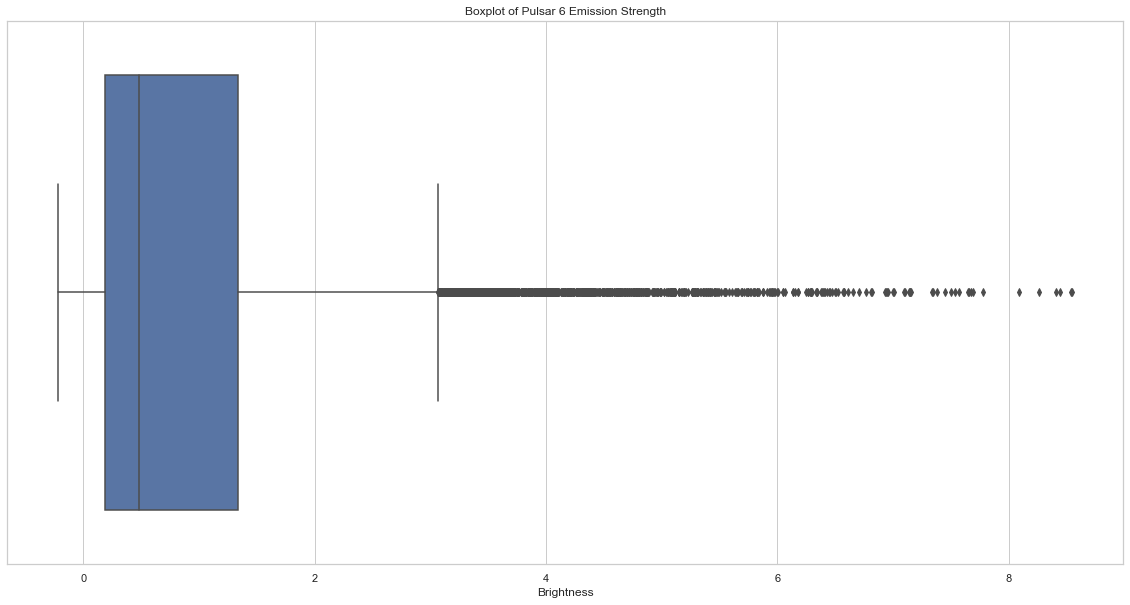

In [29]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

In [30]:
#numpy method of outlier removal

pulsar6npcleaned = pulsar6[(np.abs(stats.zscore(pulsar6["Brightness"])) <3)]
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty
0,1,0.334330,0.015570
1,2,-0.098659,0.014051
2,3,0.123514,0.011901
3,4,0.443923,0.014365
4,5,1.590446,0.057785
...,...,...,...
14321,14322,1.953645,0.081636
14322,14323,3.224787,0.146389
14325,14326,2.074136,0.080444
14326,14327,0.585504,0.026204


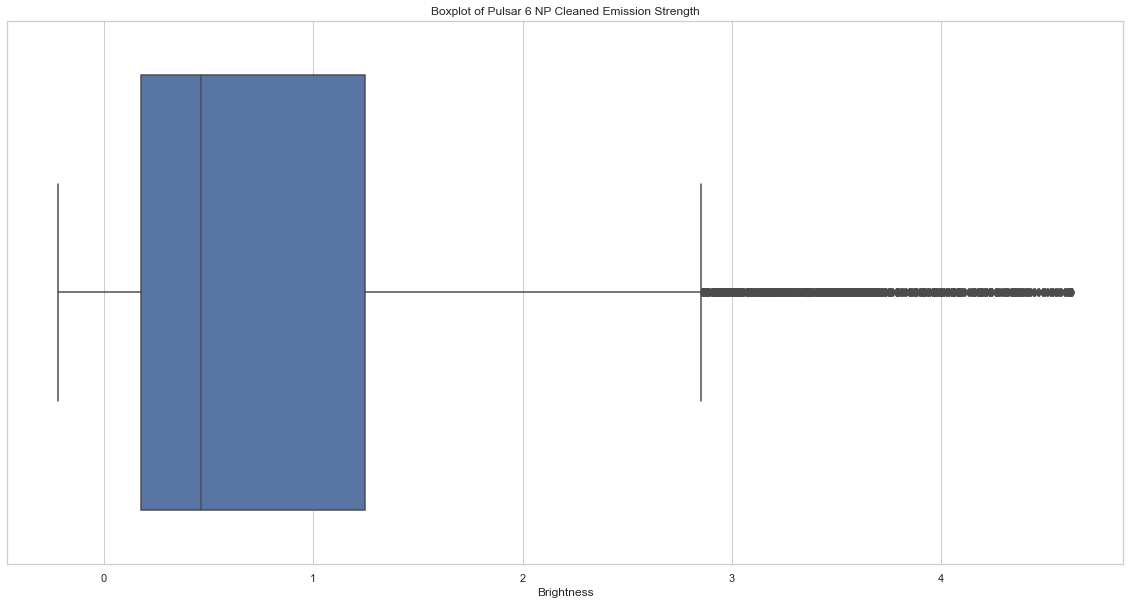

In [31]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6npcleaned["Brightness"]).set_title("Boxplot of Pulsar 6 NP Cleaned Emission Strength")

In [32]:
pulsar6npcleaned["Brightness"].describe()

count    14035.000000
mean         0.898424
std          1.016105
min         -0.219110
25%          0.179977
50%          0.463202
75%          1.249866
max          4.626978
Name: Brightness, dtype: float64

In [33]:
pulsar6npcleaned["Brightness"].median()

0.463202

In [34]:
medianpulse6 = pulsar6["Brightness"].median()
print("Median of Pulsar6: ", medianpulse6)
pulsar6['Binary'] = np.where(pulsar6['Brightness'] > medianpulse6, 1, 0)

Median of Pulsar6:  0.4818942


In [35]:
pulsar6

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.334330,0.015570,0
1,2,-0.098659,0.014051,0
2,3,0.123514,0.011901,0
3,4,0.443923,0.014365,0
4,5,1.590446,0.057785,1
...,...,...,...,...
14324,14325,4.876881,0.097181,1
14325,14326,2.074136,0.080444,1
14326,14327,0.585504,0.026204,1
14327,14328,0.360930,0.035051,0


In [36]:
median = pulsar6npcleaned["Brightness"].median()
print("Median of Pulsar6 np cleaned: ", median)
pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)

Median of Pulsar6 np cleaned:  0.463202


C:\Users\oxlay\AppData\Local\Temp/ipykernel_36012/1919336679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)


In [37]:
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.334330,0.015570,0
1,2,-0.098659,0.014051,0
2,3,0.123514,0.011901,0
3,4,0.443923,0.014365,0
4,5,1.590446,0.057785,1
...,...,...,...,...
14321,14322,1.953645,0.081636,1
14322,14323,3.224787,0.146389,1
14325,14326,2.074136,0.080444,1
14326,14327,0.585504,0.026204,1


c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


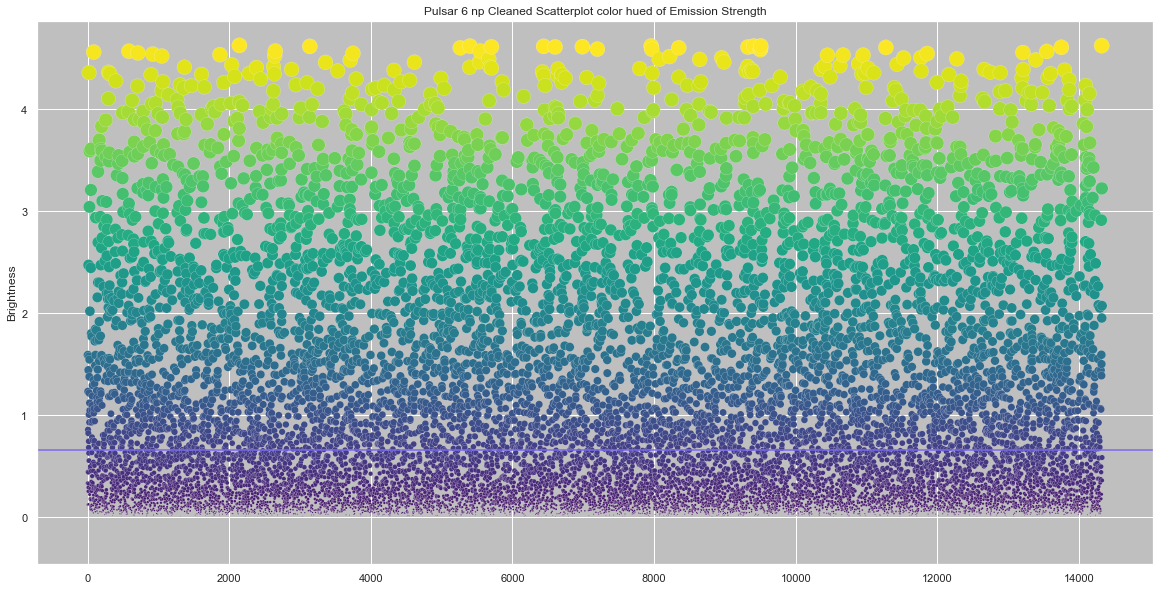

In [38]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6npcleaned.Brightness.values
ax = sns.scatterplot(data=pulsar6npcleaned["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6589028, ls='-',c='mediumslateblue')

In [39]:
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness > 0.6589028)]))
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness < 0.6589028)]))

5726
8309


c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


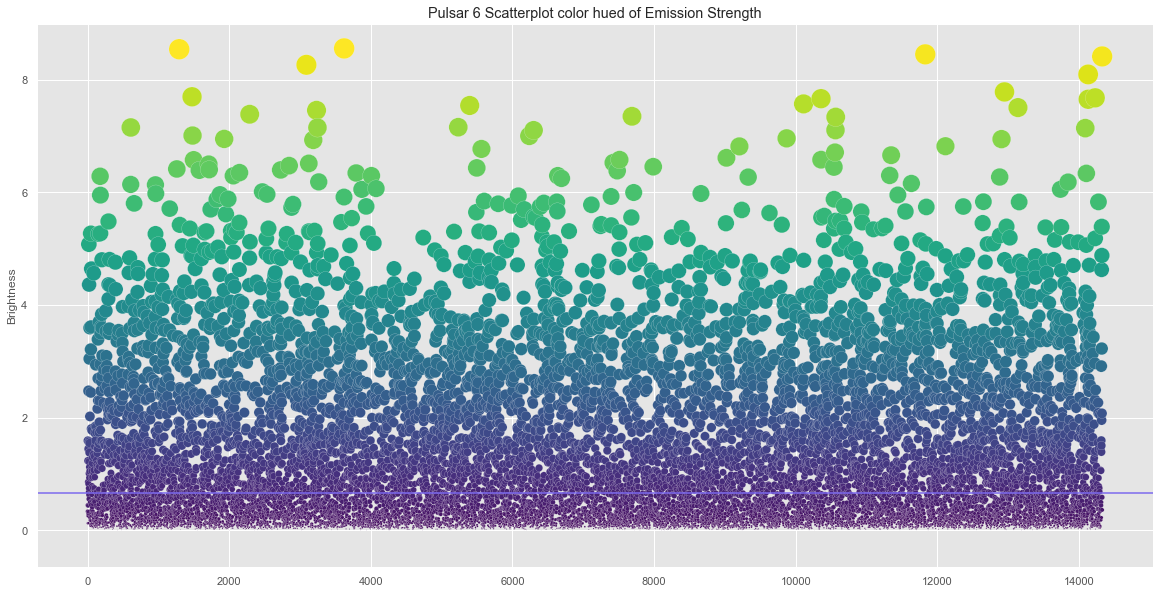

In [40]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')

In [41]:
print(len(pulsar6[(pulsar6.Brightness > 0.6589028)]))
print(len(pulsar6[(pulsar6.Brightness < 0.6589028)]))

6020
8309


In [42]:
#plt.figure(figsize=(20,10))
#sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#strength = pulsar6.Brightness.values
#ax = plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')
#ax = sns.swarmplot(data=pulsar6["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')


In [43]:
#plt.figure(figsize=(20,10))
#sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#strength = pulsar6npcleaned.Brightness.values
#ax = sns.swarmplot(data=pulsar6npcleaned["Brightness"]).set_title('Pulsar 6 np cleaned Swarm plot of Emission Strength')
#ax = plt.axhline( y=0.6589028, ls='-', c='mediumslateblue')

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 Brightness')

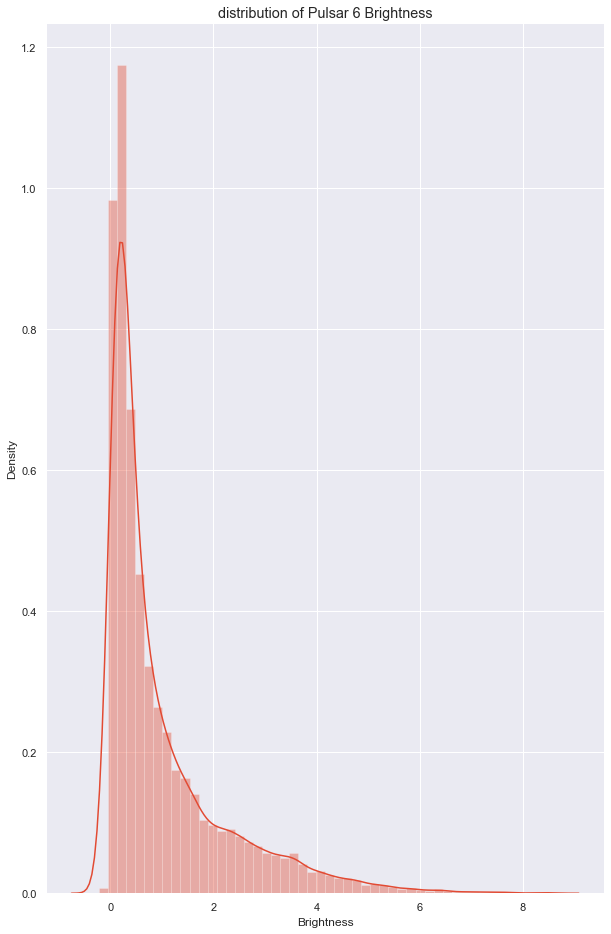

In [44]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Brightness)
plt.title("distribution of Pulsar 6 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned Brightness')

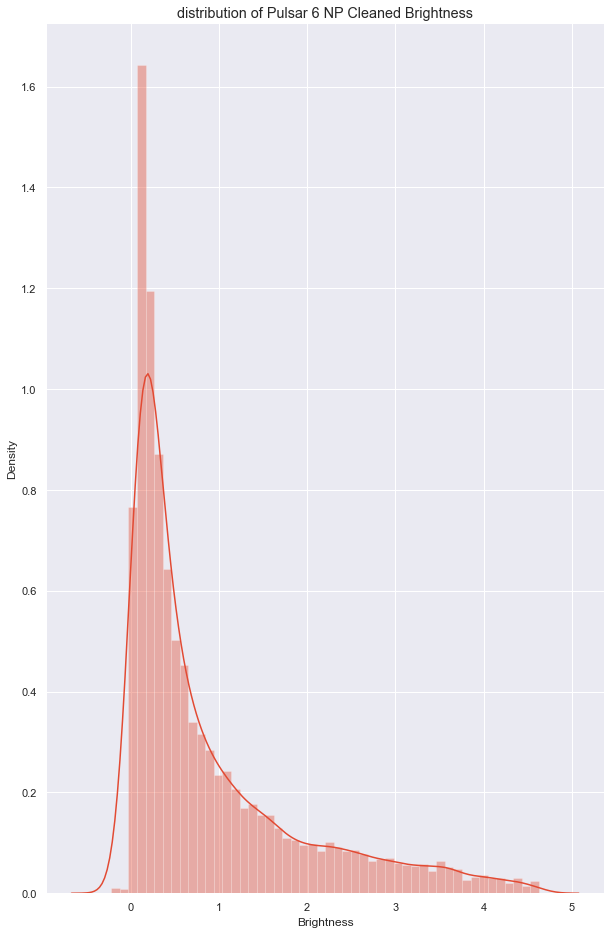

In [45]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Brightness)
plt.title("distribution of Pulsar 6 NP Cleaned Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned binary assignments')

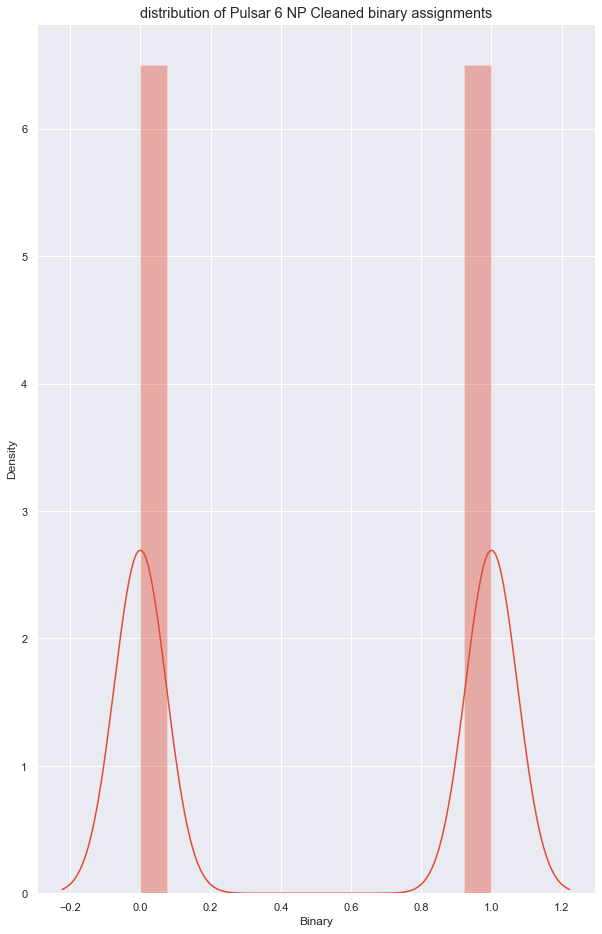

In [46]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Binary)
plt.title("distribution of Pulsar 6 NP Cleaned binary assignments")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 binary assignments')

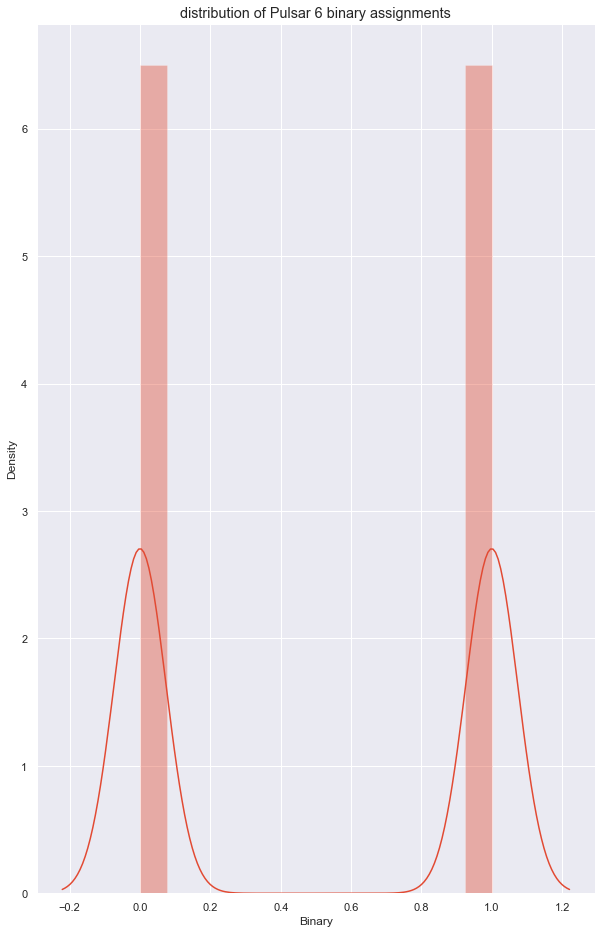

In [47]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Binary)
plt.title("distribution of Pulsar 6 binary assignments")

# Preliminary runs test
### Math Logic

$$ Z = {R - \tilde{R} \over s_{R}} $$

$$ \tilde{R} = {2_{n1 n2} \over n1 + n2} + 1 $$

$$  s^2_{R} = {2_{n1n2}(2{n1n2-n1-n2}) \over (n1+n2)^2(n1+n2-1) }$$

link to resource: https://www.geeksforgeeks.org/runs-test-of-randomness-in-python/

$ Z_{critical} = 1.96 $ as the confidence interval level of 95% thus this is a 2 tailed test. If the probability as corrosponding to this confidence interval $ H_{null} $ will be rejected as it is not statistically significant as denoted by $|Z| > Z_{critical} $

There is also code attempting to change it from a z-score probability to a P-score for ease of understanding and clarity.

# FUNCTION CODE FOR RUNS TEST

In [48]:
# MUST BE PASSED A LIST AND A INT/FLOAT 


def runsTest(data, dataMedian):
    runs = 0
    above = 0
    below = 0

    for i in range(len(data)):
        if(data[i] >= dataMedian and data[i-1] < dataMedian) or (data[i] < dataMedian and data[i-1] >= dataMedian):
            runs += 1
        
        if(data[i] >= dataMedian):
            above += 1
        
        else:
            below += 1
    
    R = ((2*above*below)/(above+below))+1
    #sdevTemp = (2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1))
    #sdevTemp = (2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)*2)*(n1+n2-1))
    Sdev = math.sqrt((2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1)))   

    float(Sdev)
    float(R)
    float(runs)
    z = (runs-R)/Sdev
    return z     

In [49]:
binaryData1 = pulsar6['Binary'].tolist()
print("pulsar6 original: ",binaryData1)

binaryData1nooutlier = pulsar6npcleaned['Binary'].tolist()
print("\n pulsar6 original: ", binaryData1nooutlier)

pulsar6 original:  [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,

In [50]:
print("Brightness Median Test")
Zscore = abs(runsTest(binaryData1, medianpulse6))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

#print("Binary Median Test")
#binarymedian1 = pulsar6["Binary"].median()

#Zscore = abs(runsTest(binaryData1, binarymedian1))
#Pval = stats.norm.sf(abs(Zscore))*2
#print('Z Statistic is: ', Zscore)
#print('P Value is : ', Pval)

#if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

#if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')


print("Removed outliers from dataset")
Zscore = abs(runsTest(binaryData1nooutlier, median))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

Brightness Median Test
Z Statistic is:  20.609922275183365
P Value is :  2.2359051767396022e-94
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.
Removed outliers from dataset
Z Statistic is:  18.84941934878813
P Value is :  2.970852673618047e-79
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.


# Analysis of the preliminary data analysis

We can see here through our printouts the value of both Z Statistic based on the above Runs Test of Randomness and the approximate correlative P-value.

If the conditional prints are not activated it meants there is no statistical significance to reject the $H_{null}$

$ H_{null} $ is where the numbers are randomly generated and sequenced
-
$ H_{alt} $ is where the numbers are not randomly generated or sequenced
-


Further testing can be done with more variety of datasets with pythonic libraries and R librariest such as NIST and Rrandtest (placeholders cant remember their names)


# Below we begin autocorrelation and autocovariance analysis

To get started with this I am playing around with guide from: https://towardsdatascience.com/a-step-by-step-guide-to-calculating-autocorrelation-and-partial-autocorrelation-8c4342b784e8

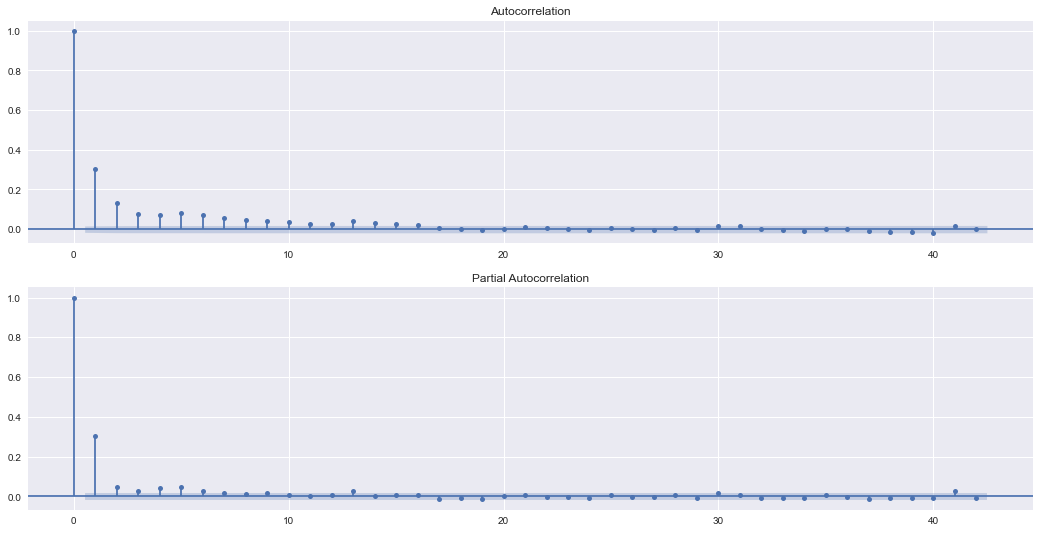

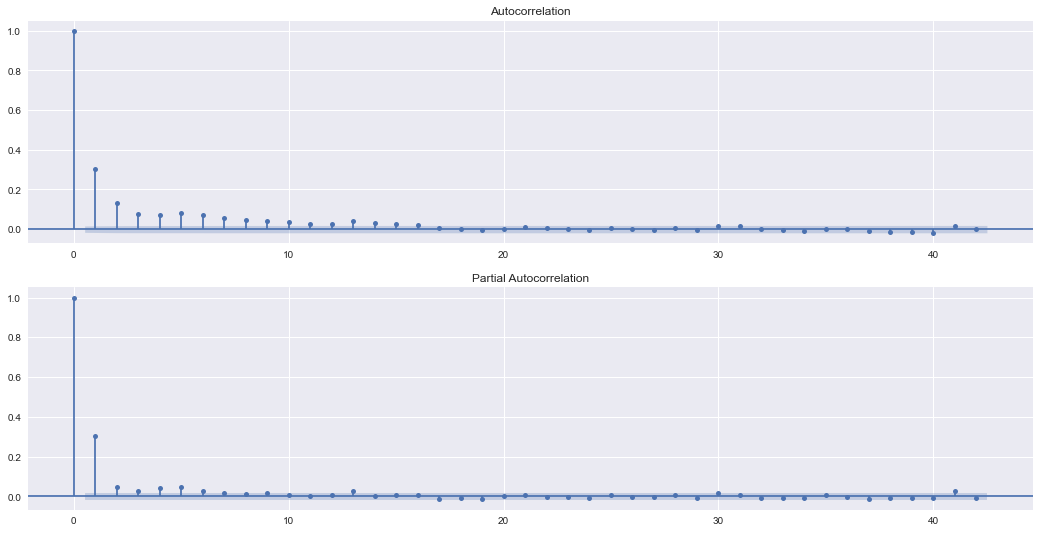

In [51]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar6['Brightness'], ax=ax[0])
plot_pacf(pulsar6['Brightness'], ax=ax[1], method="ols")

In [52]:
acf(pulsar6['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.30152047, 0.13254511, 0.07716124, 0.07364129,
       0.08096058, 0.07046427, 0.05556536, 0.0436438 , 0.04277081,
       0.03660132])

In [53]:
acfpulsar6 = pd.DataFrame()
for lag in range(0,11):
    acfpulsar6[f"B_lag_{lag}"] = pulsar6['Brightness'].shift(lag)


acfpulsar6

,B_lag_0,B_lag_1,B_lag_2,B_lag_3,B_lag_4,B_lag_5,B_lag_6,B_lag_7,B_lag_8,B_lag_9,B_lag_10
0,0.334330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.098659,0.334330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.123514,-0.098659,0.334330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.443923,0.123514,-0.098659,0.334330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.590446,0.443923,0.123514,-0.098659,0.334330,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14324,4.876881,5.386421,3.224787,1.953645,4.624813,0.225158,1.502603,1.389349,1.592995,2.913151,0.181665
14325,2.074136,4.876881,5.386421,3.224787,1.953645,4.624813,0.225158,1.502603,1.389349,1.592995,2.913151
14326,0.585504,2.074136,4.876881,5.386421,3.224787,1.953645,4.624813,0.225158,1.502603,1.389349,1.592995
14327,0.360930,0.585504,2.074136,4.876881,5.386421,3.224787,1.953645,4.624813,0.225158,1.502603,1.389349


In [54]:
acfpulsar6.corr()["B_lag_0"].values

array([1.        , 0.30191886, 0.13272532, 0.07726788, 0.07374568,
       0.08110522, 0.07062283, 0.0556971 , 0.04374889, 0.04288793,
       0.0367024 ])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [55]:
held5ths = pulsar6[pulsar6.index % 5 == 0]
held5ths

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.334330,0.015570,0
5,6,1.233848,0.018692,1
10,11,0.824310,0.036243,1
15,16,0.683800,0.049683,1
20,21,1.006799,0.029068,1
...,...,...,...,...
14305,14306,0.081548,0.011737,0
14310,14311,0.060433,0.011708,0
14315,14316,2.913151,0.089312,1
14320,14321,4.624813,0.095899,1


In [56]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

0.49492415

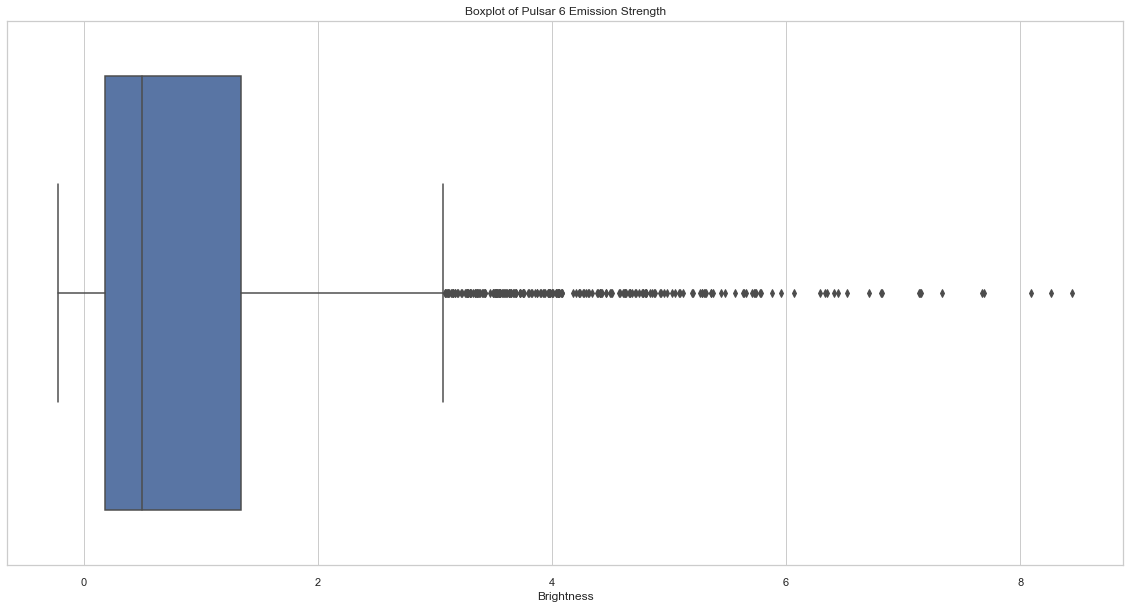

In [57]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


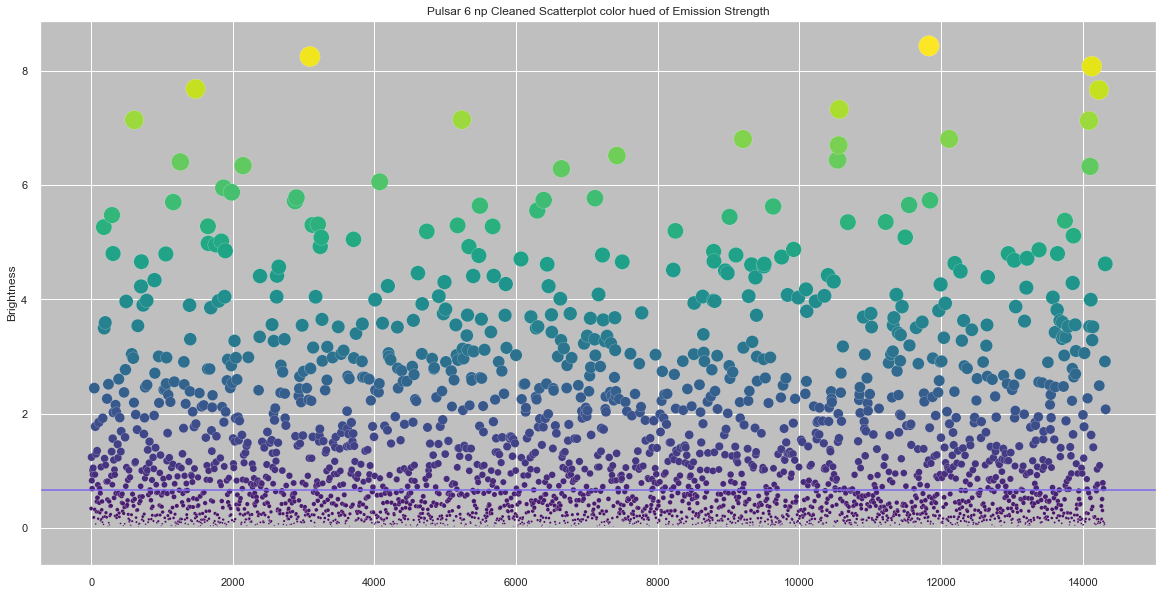

In [58]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


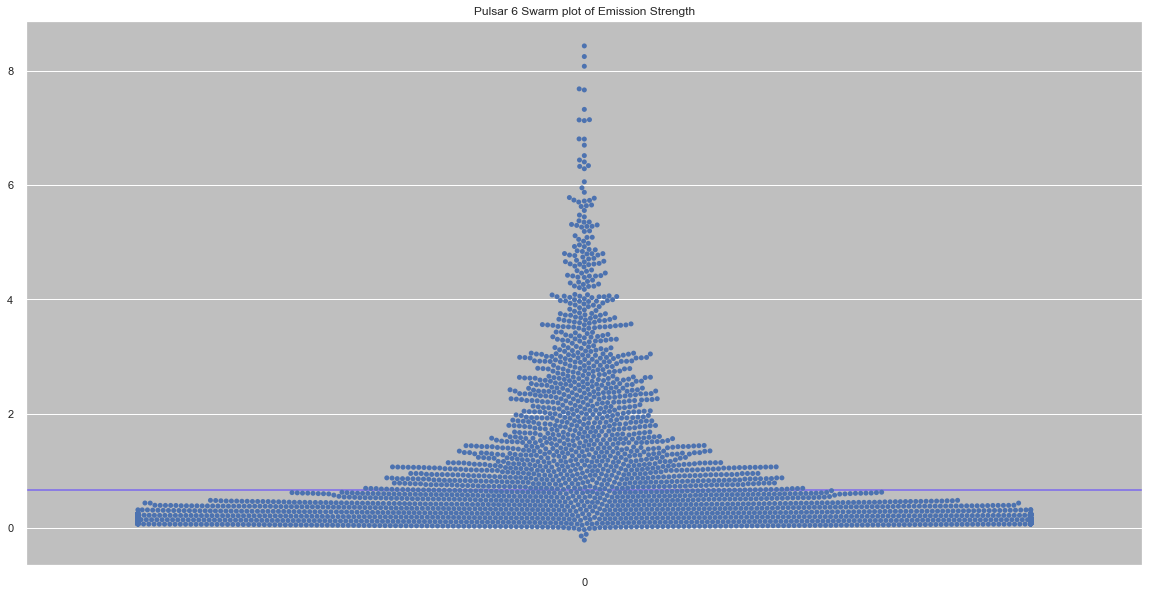

In [59]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=held5ths["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [60]:
print(len(held5ths[(held5ths.Brightness > 0.6508051)]))
print(len(held5ths[(held5ths.Brightness < 0.6508051)]))

1225
1641


#### isolating every 100 rows into discrete sets.

In [61]:
size = 100
N = int(len(pulsar6)/size)
pulsarsubframes = [pulsar6.iloc[i*size:(i+1)*size].copy() for i in range(N+1)]
#pulsarsubframes[-1]

frame1 = pulsarsubframes[0]
frame2 = pulsarsubframes[1]
frame3 = pulsarsubframes[2]
frame4 = pulsarsubframes[3]
frame5 = pulsarsubframes[4]
frame6 = pulsarsubframes[5]
frame7 = pulsarsubframes[6]

medianframe1 = frame1["Brightness"].median()
print("Median of Pulsar6: ", medianframe1)
frame1['Binary'] = np.where(frame1['Brightness'] > 0.6589028, 1, 0)

medianframe2 = frame2["Brightness"].median()
print("Median of Pulsar6: ", medianframe2)
frame2['Binary'] = np.where(frame2['Brightness'] > 0.6589028, 1, 0)

medianframe3 = frame3["Brightness"].median()
print("Median of Pulsar6: ", medianframe3)
frame3['Binary'] = np.where(frame3['Brightness'] > 0.6589028, 1, 0)

medianframe4 = frame4["Brightness"].median()
print("Median of Pulsar6: ", medianframe4)
frame4['Binary'] = np.where(frame4['Brightness'] > 0.6589028, 1, 0)

medianframe5 = frame5["Brightness"].median()
print("Median of Pulsar6: ", medianframe5)
frame5['Binary'] = np.where(frame5['Brightness'] > 0.6589028, 1, 0)

medianframe6 = frame6["Brightness"].median()
print("Median of Pulsar6: ", medianframe6)
frame6['Binary'] = np.where(frame6['Brightness'] > 0.6589028, 1, 0)

medianframe7 = frame7["Brightness"].median()
print("Median of Pulsar6: ", medianframe7)
frame7['Binary'] = np.where(frame7['Brightness'] > 0.6589028, 1, 0)

Median of Pulsar6:  0.5026970500000001
Median of Pulsar6:  0.51008585
Median of Pulsar6:  0.4816923
Median of Pulsar6:  0.5924740500000001
Median of Pulsar6:  0.5514198
Median of Pulsar6:  0.4614794
Median of Pulsar6:  0.51528245


In [62]:
framebinary = []

In [63]:
print(frame1)

storeover1 = len(frame1[(frame1.Brightness > frame1["Brightness"].median())])
storeunder1 = len(frame1[(frame1.Brightness < frame1["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

    Pulse Number  Brightness  Uncertainty  Binary
0              1    0.334330     0.015570       0
1              2   -0.098659     0.014051       0
2              3    0.123514     0.011901       0
3              4    0.443923     0.014365       0
4              5    1.590446     0.057785       1
..           ...         ...          ...     ...
95            96    0.750109     0.025115       1
96            97    0.160808     0.023513       0
97            98    0.505602     0.014070       0
98            99    1.310186     0.076577       1
99           100    0.165530     0.016578       0

[100 rows x 4 columns]


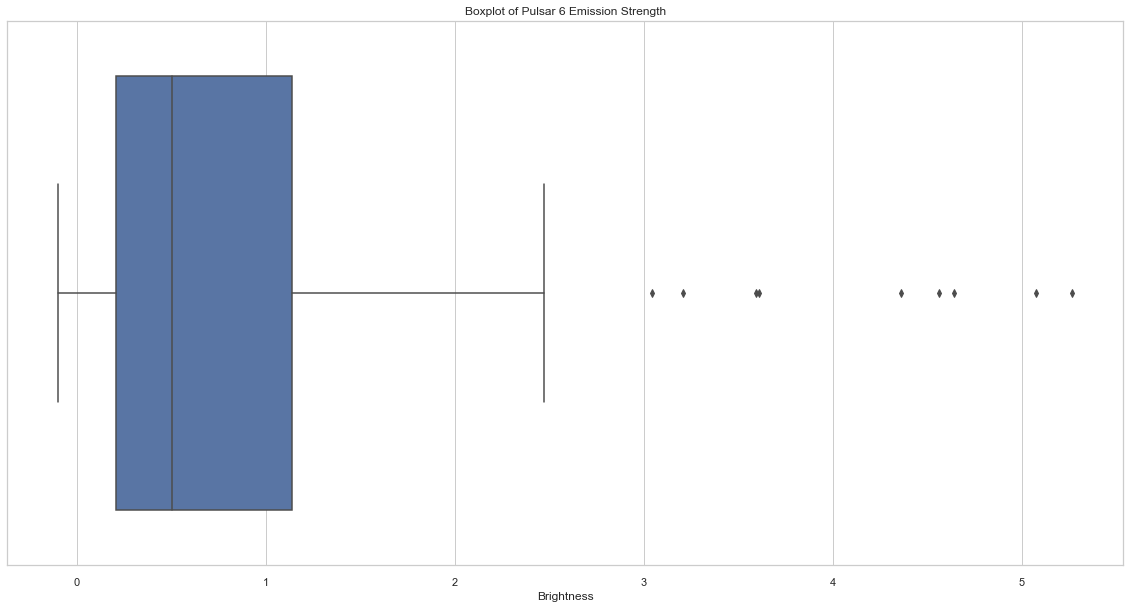

In [64]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame1["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


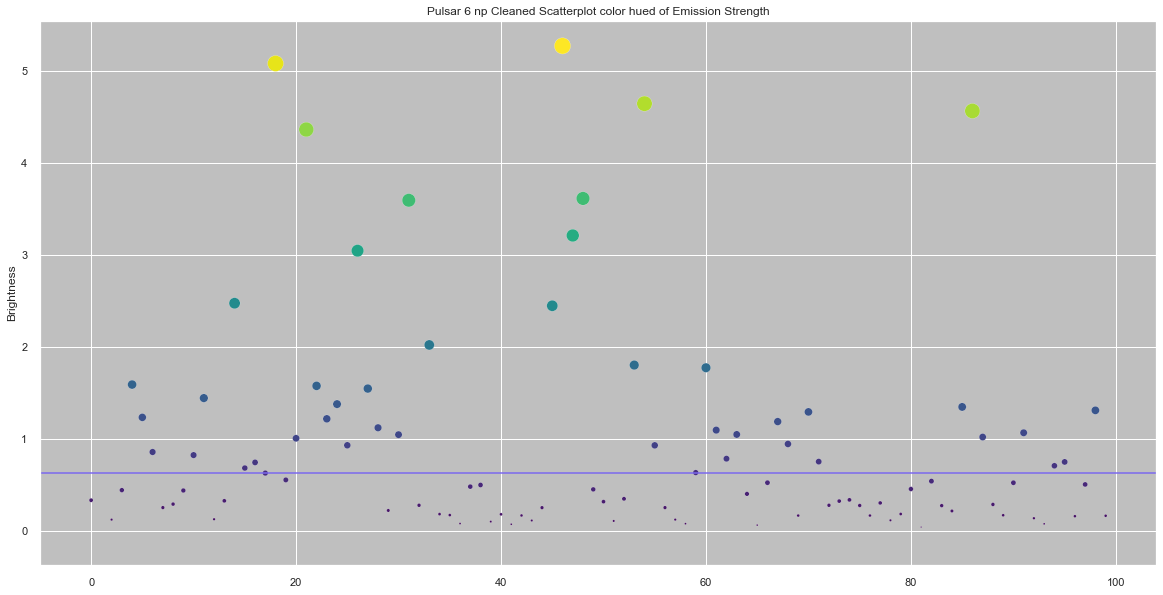

In [65]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame1.Brightness.values
ax = sns.scatterplot(data=frame1["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.63457545, ls='-',c='mediumslateblue')

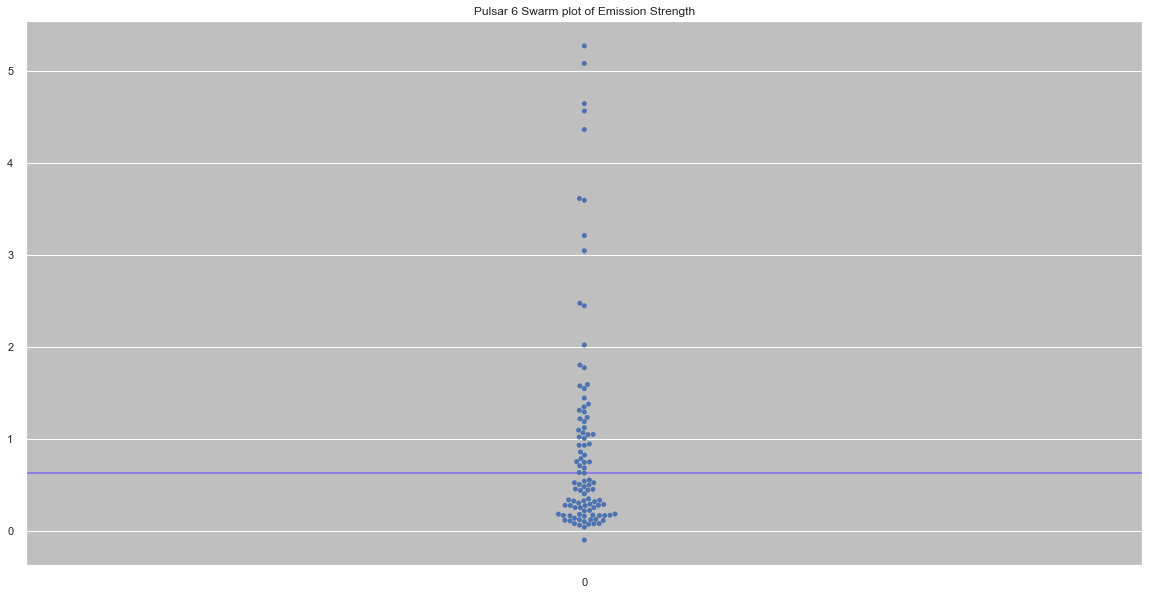

In [66]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame1.Brightness.values
ax = plt.axhline( y=0.63457545, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=frame1["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [67]:
print(frame2)

storeover1 = len(frame2[(frame2.Brightness > frame2["Brightness"].median())])
storeunder1 = len(frame2[(frame2.Brightness < frame2["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
100           101    0.155822     0.015301       0
101           102    0.942604     0.021126       1
102           103    0.080025     0.011560       0
103           104    1.726730     0.024935       1
104           105    0.282512     0.015599       0
..            ...         ...          ...     ...
195           196    0.194185     0.012644       0
196           197    0.316062     0.018405       0
197           198    2.642258     0.109246       1
198           199    1.589297     0.033723       1
199           200    3.832953     0.115142       1

[100 rows x 4 columns]


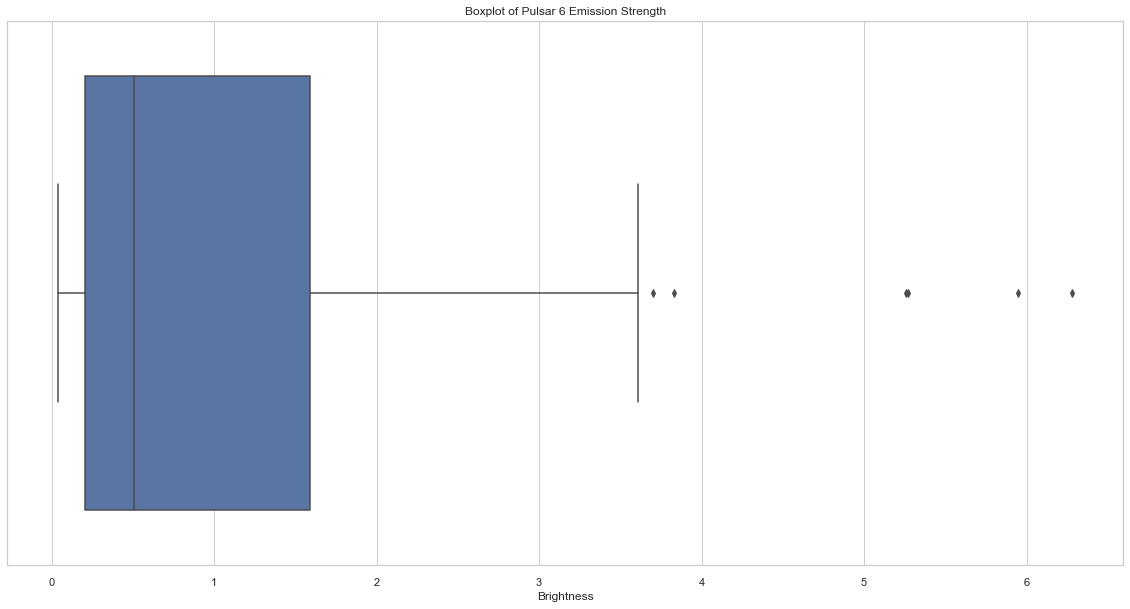

In [68]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame2["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

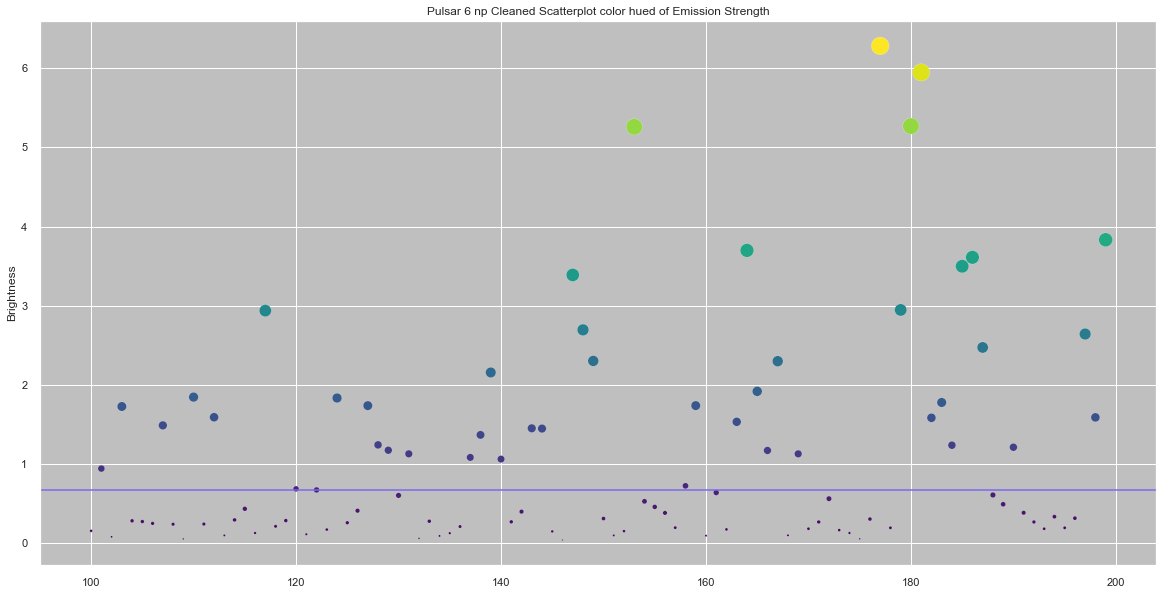

In [69]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame2.Brightness.values
ax = sns.scatterplot(data=frame2["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6688056, ls='-',c='mediumslateblue')

In [70]:
print(frame3)

storeover1 = len(frame3[(frame3.Brightness > frame3["Brightness"].median())])
storeunder1 = len(frame3[(frame3.Brightness < frame3["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
200           201    3.594045     0.097699       1
201           202    0.051803     0.011609       0
202           203    4.801105     0.103787       1
203           204    0.635424     0.044798       0
204           205    0.300850     0.017684       0
..            ...         ...          ...     ...
295           296    5.480445     0.152415       1
296           297    4.364131     0.099929       1
297           298    2.702979     0.031921       1
298           299    1.183369     0.058814       1
299           300    0.497151     0.031577       0

[100 rows x 4 columns]


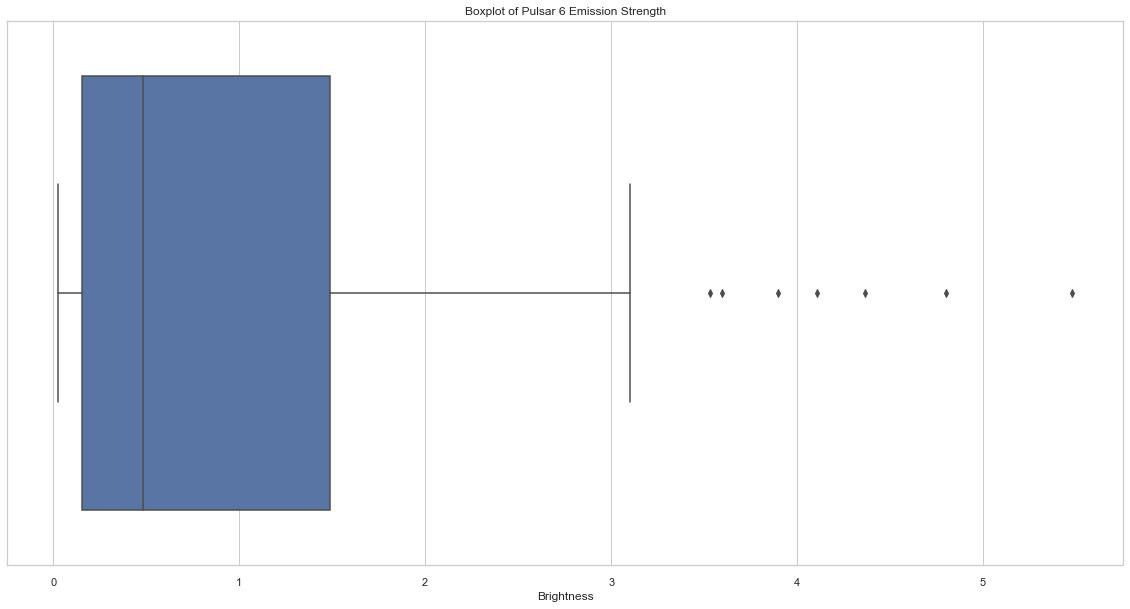

In [71]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame3["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

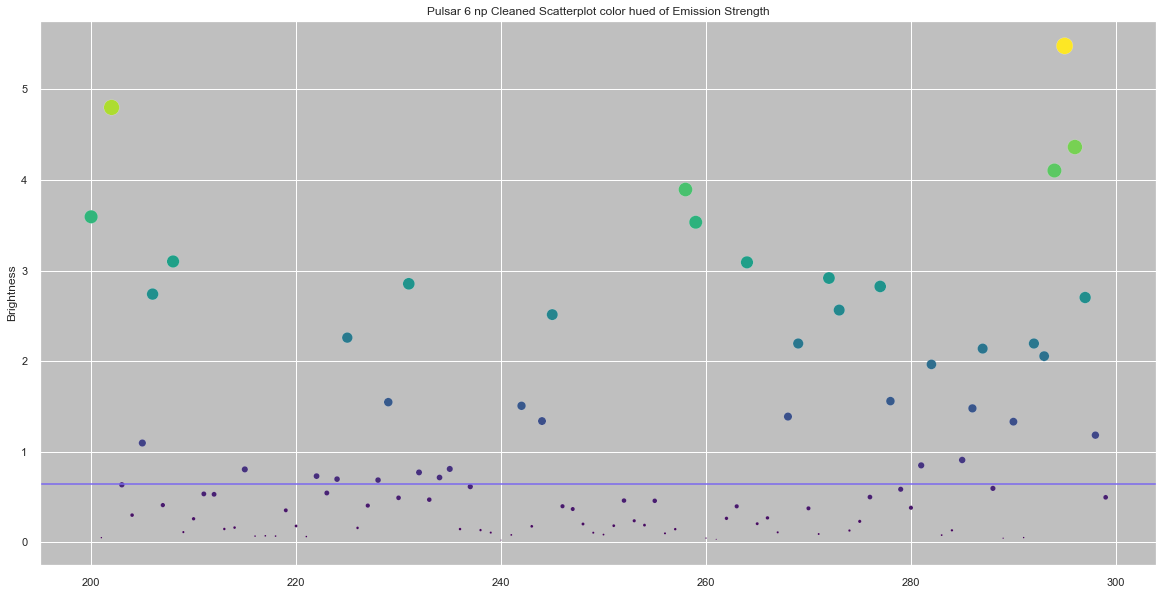

In [72]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame3.Brightness.values
ax = sns.scatterplot(data=frame3["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.63955675, ls='-',c='mediumslateblue')

In [73]:
print(frame4)

storeover1 = len(frame4[(frame4.Brightness > frame4["Brightness"].median())])
storeunder1 = len(frame4[(frame4.Brightness < frame4["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
300           301    0.752224     0.013478       1
301           302    0.044526     0.017585       0
302           303    0.136238     0.012373       0
303           304    2.453816     0.052952       1
304           305    3.490430     0.082398       1
..            ...         ...          ...     ...
395           396    0.255389     0.021147       0
396           397    1.877745     0.050873       1
397           398    2.488890     0.042020       1
398           399    4.278668     0.102554       1
399           400    0.224342     0.030270       0

[100 rows x 4 columns]


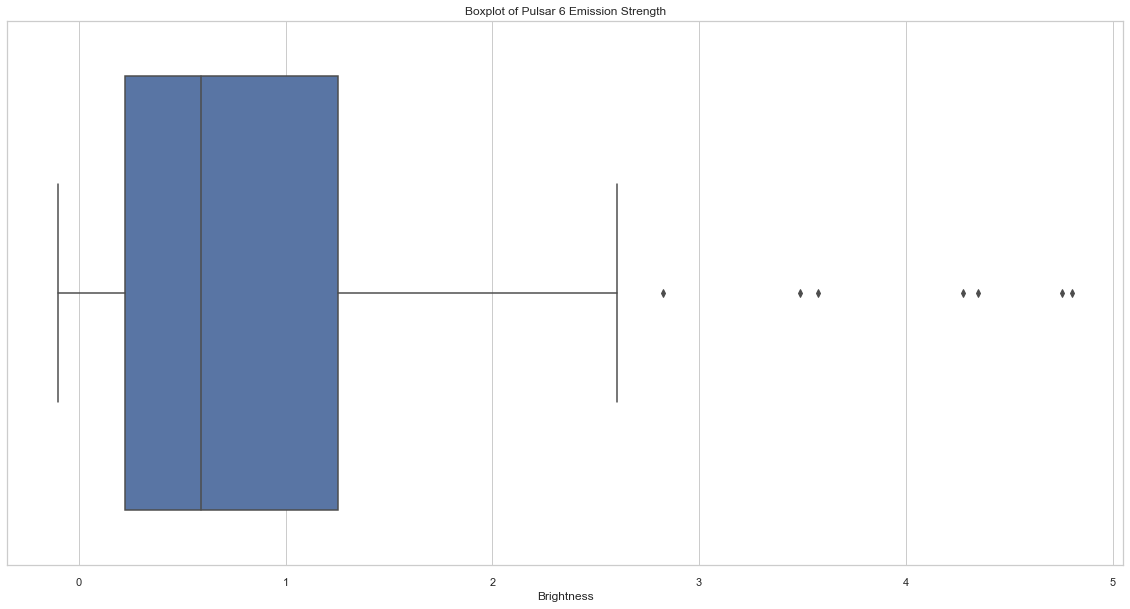

In [74]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame4["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


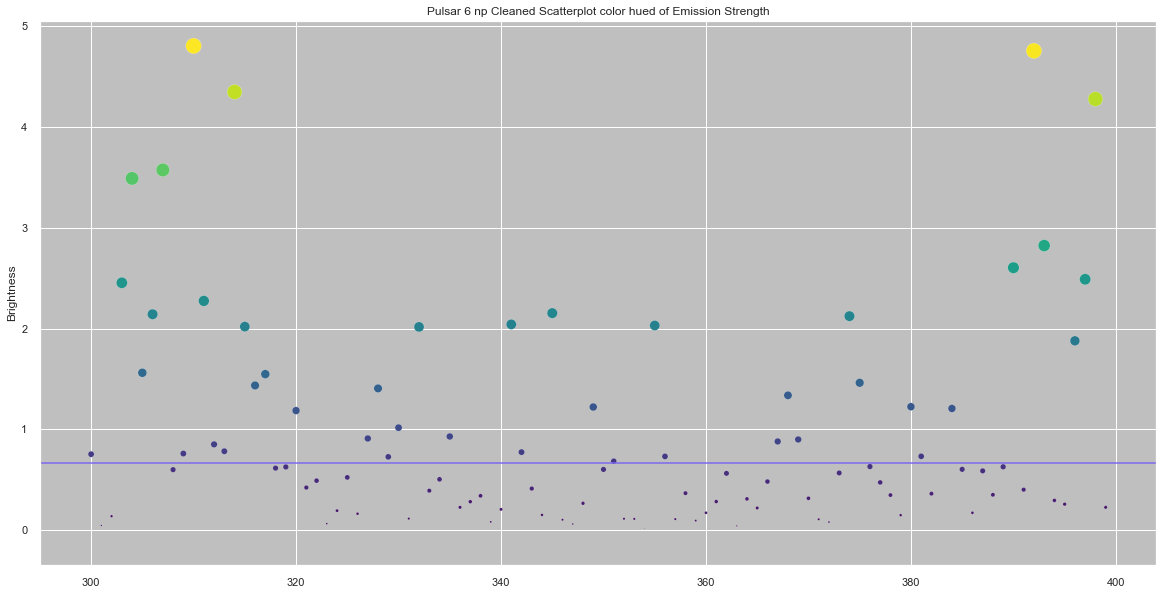

In [75]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame4.Brightness.values
ax = sns.scatterplot(data=frame4["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.66777675, ls='-',c='mediumslateblue')

In [76]:
print(frame5)

storeover1 = len(frame5[(frame5.Brightness > frame5["Brightness"].median())])
storeunder1 = len(frame5[(frame5.Brightness < frame5["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
400           401    0.187781     0.016491       0
401           402    0.518913     0.019550       0
402           403    0.236001     0.011673       0
403           404    1.357572     0.082541       1
404           405    0.546322     0.046093       0
..            ...         ...          ...     ...
495           496    3.965513     0.104712       1
496           497    3.170765     0.104571       1
497           498    0.943841     0.054526       1
498           499    0.741208     0.021196       1
499           500    0.107744     0.013280       0

[100 rows x 4 columns]


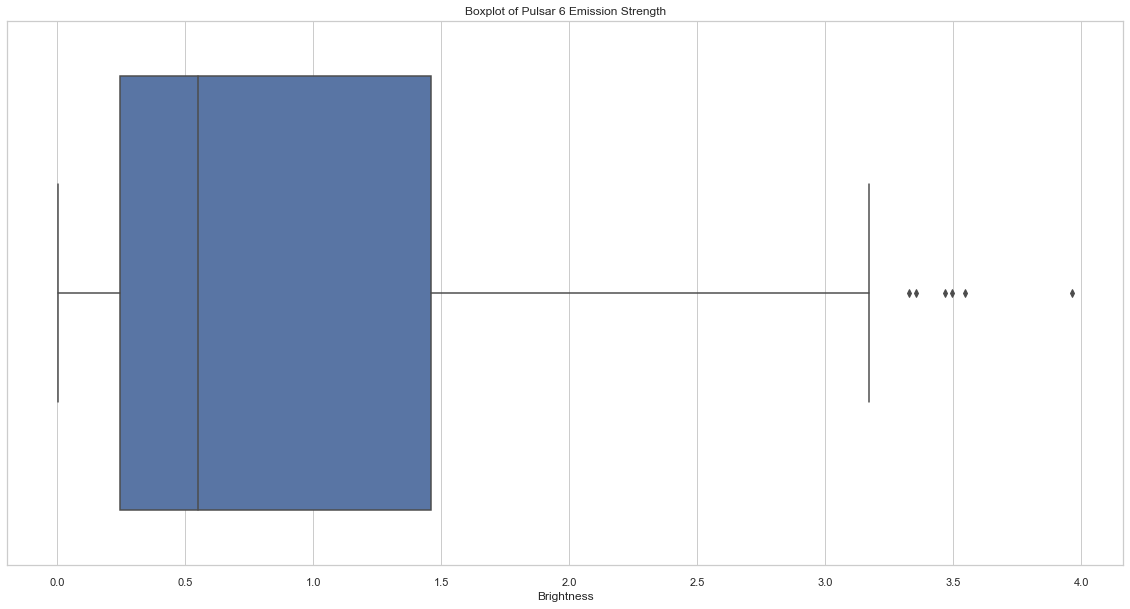

In [77]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame5["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

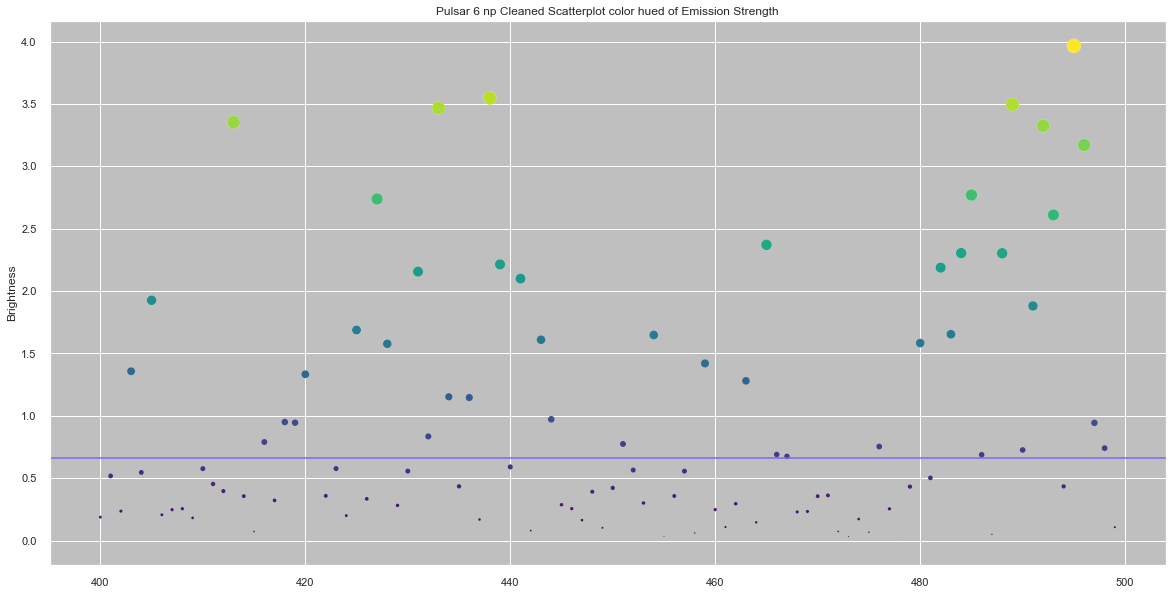

In [78]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame5.Brightness.values
ax = sns.scatterplot(data=frame5["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6605900499999999, ls='-',c='mediumslateblue')

In [79]:
print(frame6)

storeover1 = len(frame6[(frame6.Brightness > frame6["Brightness"].median())])
storeunder1 = len(frame6[(frame6.Brightness < frame6["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
500           501    1.058264     0.058326       1
501           502    1.189531     0.059480       1
502           503    2.993595     0.076166       1
503           504    0.105349     0.012204       0
504           505    0.316096     0.018697       0
..            ...         ...          ...     ...
595           596    2.973716     0.053489       1
596           597    1.192016     0.060239       1
597           598    0.251920     0.025635       0
598           599    0.647808     0.025142       0
599           600    2.541731     0.076273       1

[100 rows x 4 columns]


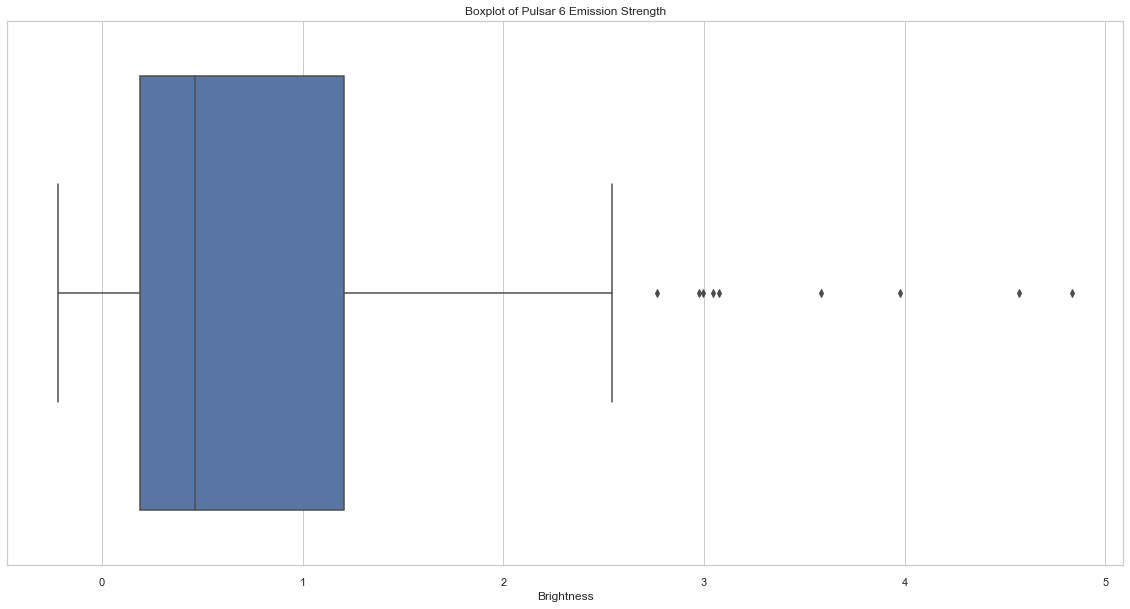

In [80]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


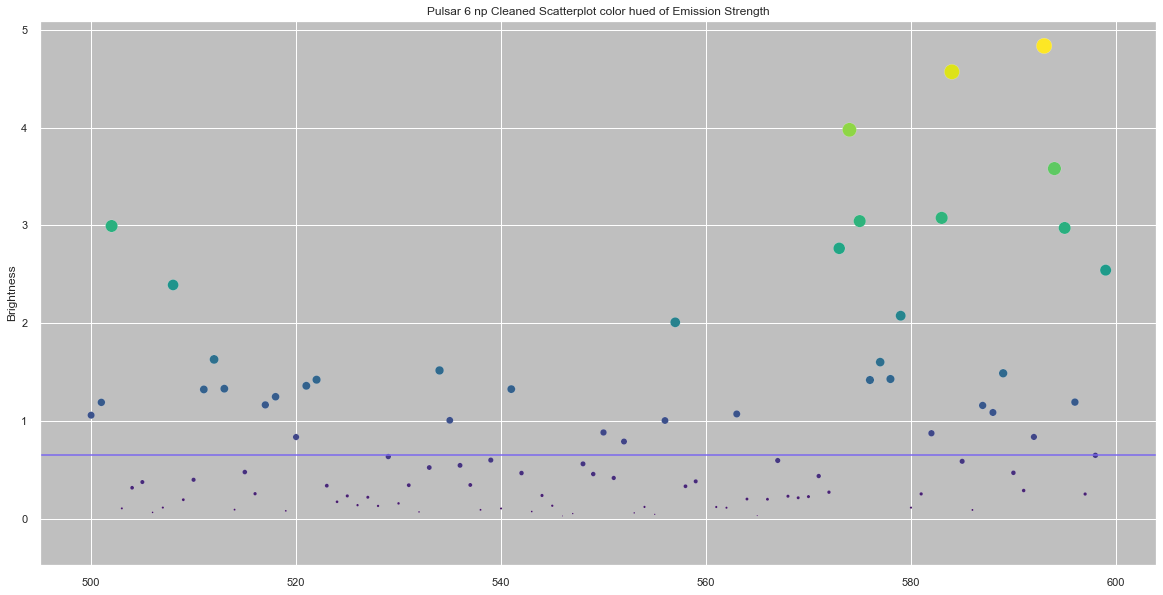

In [81]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame6.Brightness.values
ax = sns.scatterplot(data=frame6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.65585835, ls='-',c='mediumslateblue')

In [82]:
print(frame7)

storeover1 = len(frame7[(frame7.Brightness > frame7["Brightness"].median())])
storeunder1 = len(frame7[(frame7.Brightness < frame7["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
600           601    0.380998     0.022300       0
601           602    0.870660     0.041550       1
602           603    0.093141     0.012333       0
603           604    0.706349     0.015836       1
604           605    1.107540     0.054172       1
..            ...         ...          ...     ...
695           696    0.466401     0.036121       0
696           697    0.122473     0.011800       0
697           698    0.338522     0.014555       0
698           699    2.329680     0.095637       1
699           700    2.321594     0.091773       1

[100 rows x 4 columns]


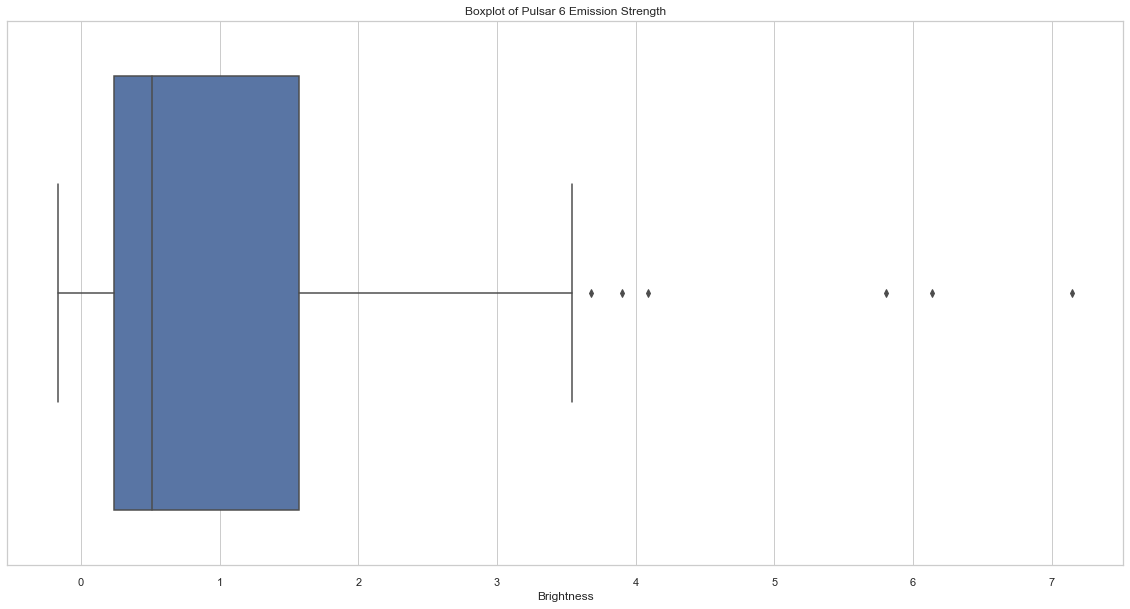

In [83]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame7["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


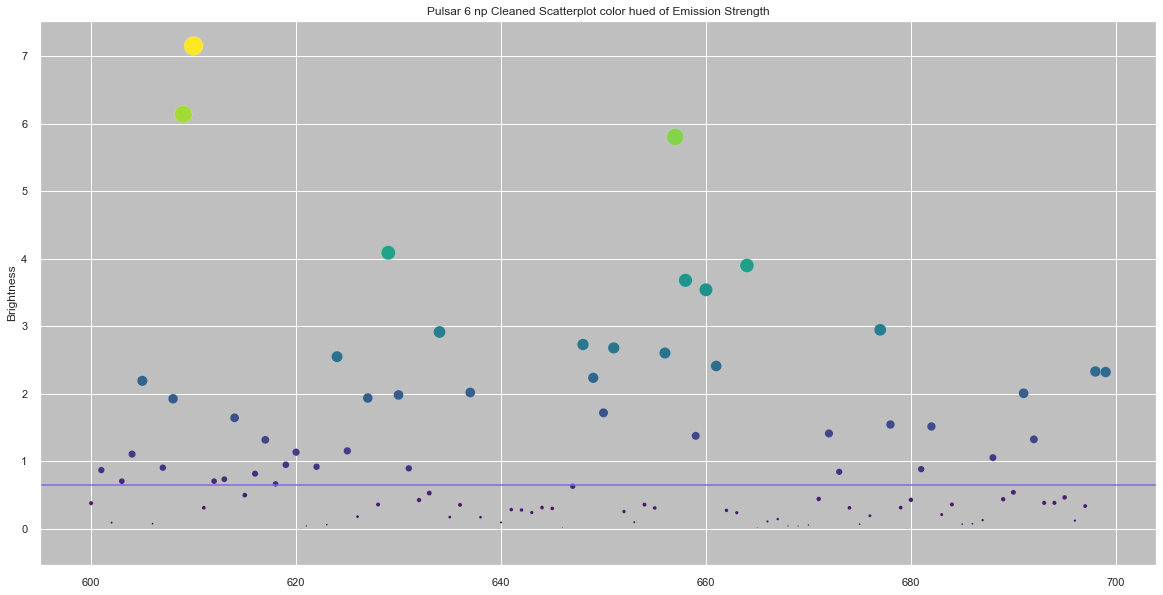

In [84]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame7.Brightness.values
ax = sns.scatterplot(data=frame7["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6504474499999999, ls='-',c='mediumslateblue')

In [85]:
framebinary
#this didn't go to plan.

[0, 0, 0, 0, 0, 0, 0]

#### Randomness testing

In [86]:
np.savetxt(r'framebinarypulsar3.txt', framebinary, fmt='%d', delimiter='')
np.savetxt(r'every5thbinarypulsar3.txt', held5ths.Binary, fmt='%d', delimiter='')
np.savetxt(r'allpulsar3.txt', pulsar6.Binary, fmt='%d', delimiter='')
np.savetxt(r'npcleanedpulsar3.txt', pulsar6npcleaned.Binary, fmt='%d', delimiter='')